### Import libraries

In [209]:
import numpy as np
import cv2
import os

**Parameter**

In [210]:
folder_path = "trafficSignData"
label_file = 'labels.csv'
imageDimesions = (32, 32)
imageDimesiontest = (32, 32, 3)
ratio = 0.2

### Load the images and number of classes

In [211]:
images = []
classNumber = []

In [212]:
# get the path of the traffic data
myList = os.listdir(folder_path)
print("View each classes in traffic folder :", myList, "\n")

# get the number of classes (number of folder)
lengthOfClasses = len(myList)
print("Total length of classes :", lengthOfClasses, "\n")


View each classes in traffic folder : ['50', '57', '32', '35', '56', '51', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '45', '6', '28', '17', '1', '10', '19', '26', '8', '21', '44', '43', '38', '36', '31', '54', '53', '30', '37', '39', '52', '55', '46', '41', '48', '24', '23', '4', '15', '3', '12', '49', '40', '47', '2', '13', '5', '14', '22', '25'] 

Total length of classes : 58 



### Iterate to load the images and classes

In [213]:
print("Iterating to load images & classes\n")
# iterate 0 to length of classes (58)
for x in range(0, lengthOfClasses): # x is folder
    imagesList = os.listdir(os.path.join(folder_path, str(x))) # each (x) folder in trafficSignData 
    for img in imagesList:
        currentImage = cv2.imread(folder_path + "/" + str(x) + "/" + img) # trafficSignData --> x folder --> img = images
        if currentImage is not None:  # Check image is read
            currentImage = cv2.resize(currentImage, imageDimesions) # Resize to the dimensions to 32 X 32 pixels
            images.append(currentImage)
            classNumber.append(x)
        else:
            print(f"It is wrong folder path {folder_path}")
    print(x, end=" ")

Iterating to load images & classes

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 

### Convert list to numpy array

In [214]:
# Convert list to numpy array
images = np.array(images)
classNumber = np.array(classNumber)

**Result**

In [215]:
print(images)
print(classNumber)

[[[[ 41  39  32]
   [ 38  39  31]
   [ 38  38  30]
   ...
   [155 153 151]
   [190 190 190]
   [192 192 192]]

  [[ 40  40  30]
   [ 38  38  32]
   [ 40  38  31]
   ...
   [151 150 147]
   [189 190 190]
   [189 189 189]]

  [[ 41  41  31]
   [ 39  39  30]
   [ 38  39  30]
   ...
   [145 146 141]
   [188 188 188]
   [185 185 185]]

  ...

  [[194 189 181]
   [195 190 176]
   [196 189 178]
   ...
   [121  49   7]
   [123  51   5]
   [121  50   8]]

  [[194 185 171]
   [193 184 173]
   [194 185 172]
   ...
   [165 158 151]
   [167 160 150]
   [167 162 153]]

  [[179 174 166]
   [179 174 166]
   [183 176 168]
   ...
   [125  55  13]
   [126  56  12]
   [127  55  13]]]


 [[[126  64  21]
   [138  91  58]
   [143 102  71]
   ...
   [165 155 142]
   [176 180 185]
   [162 166 170]]

  [[139 110  93]
   [154 140 129]
   [120  78  58]
   ...
   [164 159 153]
   [174 178 183]
   [169 171 171]]

  [[135  97  75]
   [145 114 101]
   [140 126 119]
   ...
   [157 162 164]
   [185 188 192]
   [179 179

**Check images shape and classNumber**

- the first number is number of images
- 32 x 32 images
- 3 mean RGB 3 channals

In [216]:
print(images.shape)
print(classNumber.shape)

(4170, 32, 32, 3)
(4170,)


### Data Spliting

**import train_test_split**

In [217]:
from sklearn.model_selection import train_test_split

### Spliting the data
- split the array images, classNumber, set the test size for exmaple 0.2
- test_size = 0.2 means that training will be 0.8 percent and test will be 0.2, so 20% testing and 80% training

In [218]:
X_train, X_test, y_train, y_test = train_test_split(images, classNumber, test_size=ratio)

**Check whether it is split or not (train, test)**
- by using shape function

In [219]:
print("After spliting for images for traning")
print(X_train.shape)
print("After spliting for images for testing")
print(X_test.shape)

print("\n After spliting for classNUmber for traning & testing")
print(y_train.shape)
print(y_test.shape)

After spliting for images for traning
(3336, 32, 32, 3)
After spliting for images for testing
(834, 32, 32, 3)

 After spliting for classNUmber for traning & testing
(3336,)
(834,)


**Get the X_validation**
- to get X_validation use the 80% of images array which is X_train and use y_train

In [220]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=ratio)
print('Get the X_validation')
print(X_validation.shape)

Get the X_validation
(668, 32, 32, 3)


**Print X_train, X_test, and X_validation**

In [221]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# print(X_train)
# print(y_train)

(2668, 32, 32, 3) (2668,)
(834, 32, 32, 3) (834,)
(668, 32, 32, 3) (668,)


### Check the images and classes are match & dimension are correct

In [222]:
try:
    # check it is same or not
    assert X_train.shape[0] == y_train.shape[0], "Number of images and class should be match for training"
    assert X_test.shape[0] == y_test.shape[0], "Number of images and class should be match for testing"
    # check dimensions is same or not
    assert X_train.shape[1:] == imageDimesiontest, "Dimensions should be same one for training"
    assert X_test.shape[1:] == imageDimesiontest, "Dimensions should be same one for testing"
    print("All tests passed")
except AssertionError as e:
    print(e)


All tests passed


**What inside the X and Y**
- X_train contain = actual images, Y_train contain = the ids of each image

In [223]:
# show the all the index numbers which are class number 0
print("Index which related to class 0")
print(np.where(y_train==0))
# total length of classNumber 0
print("Length of the class 0")
print(len(np.where(y_train==0)[0]))

# Declare array to store length of each class
numberOfSamples = []

print("Total number of images for each Class")
for x in range(0,lengthOfClasses):
    print(f"Class {x}: {len(np.where(y_train == x)[0])}")
    # save each class in array
    numberOfSamples.append(len(np.where(y_train == x)[0]))

print(f"Array of classes's length : {numberOfSamples}")

Index which related to class 0
(array([  25,  154,  158,  166,  245,  284,  293,  355,  374,  417,  461,
        513,  517,  525,  536,  556,  586,  588,  593,  609,  619,  765,
        815,  838,  861,  937,  945,  968,  982, 1114, 1158, 1174, 1211,
       1219, 1275, 1315, 1371, 1455, 1474, 1492, 1505, 1526, 1544, 1559,
       1576, 1648, 1656, 1663, 1693, 1707, 1738, 1768, 1876, 1891, 1949,
       2012, 2024, 2184, 2221, 2249, 2264, 2373, 2412, 2459, 2484, 2494,
       2498, 2501, 2507, 2514, 2537, 2604, 2621, 2624]),)
Length of the class 0
74
Total number of images for each Class
Class 0: 74
Class 1: 23
Class 2: 52
Class 3: 172
Class 4: 57
Class 5: 126
Class 6: 53
Class 7: 91
Class 8: 5
Class 9: 2
Class 10: 49
Class 11: 94
Class 12: 59
Class 13: 22
Class 14: 85
Class 15: 15
Class 16: 91
Class 17: 74
Class 18: 5
Class 19: 4
Class 20: 13
Class 21: 9
Class 22: 9
Class 23: 9
Class 24: 64
Class 25: 1
Class 26: 81
Class 27: 15
Class 28: 286
Class 29: 29
Class 30: 102
Class 31: 30
Class 3

### Virtualize the classes by number of length
- to make the chart, we need to import the matplotlib

**Import library**

In [224]:
import matplotlib.pyplot as plt

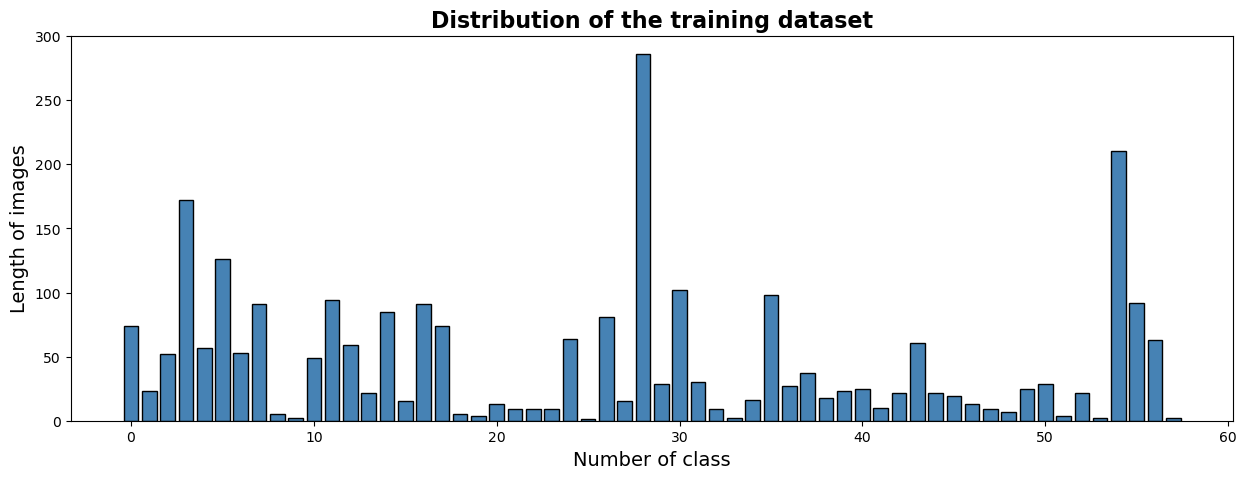

In [225]:
# 15 mean to length of figure & 5 mean to height of figure
plt.figure(figsize=(15, 5))

# start 0 to lengthofClasses, 
plt.bar(range(0, lengthOfClasses), numberOfSamples, color="steelblue", edgecolor='black')
plt.title("Distribution of the training dataset", fontsize=16, fontweight='bold')
plt.xlabel("Number of class", fontsize=14)
plt.ylabel("Length of images", fontsize=14)
plt.show()

### Virtualize with line chart

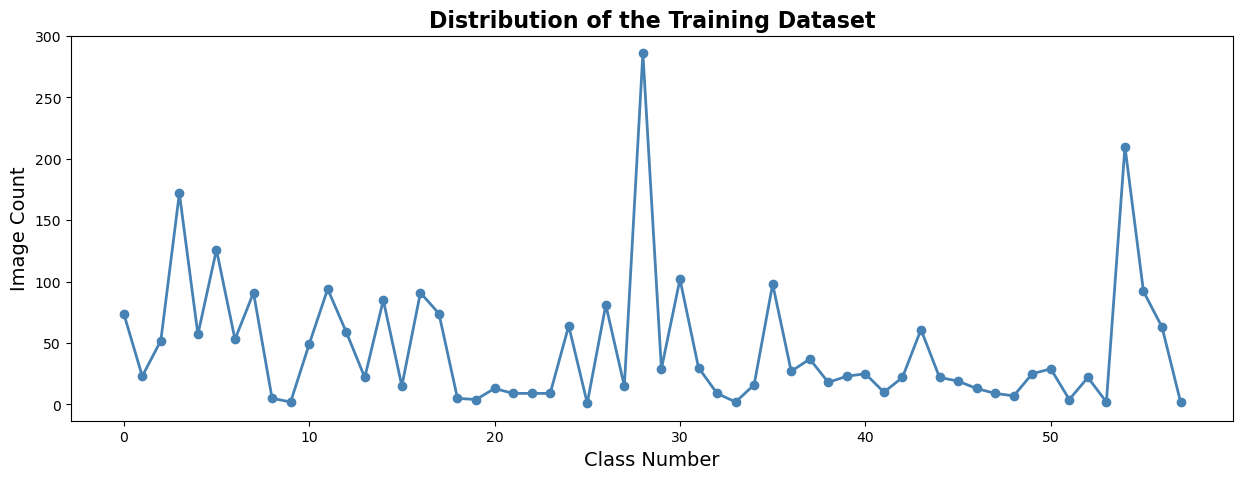

In [226]:
plt.figure(figsize=(15, 5))
plt.plot(range(0, lengthOfClasses), numberOfSamples, marker='o', color="steelblue", linewidth=2)
plt.title("Distribution of the Training Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Class Number", fontsize=14)
plt.ylabel("Image Count", fontsize=14)
plt.show()


### Read the CSV file
- to read the csv files, the pandas library need to import

In [227]:
import pandas as pd

In [228]:
data = pd.read_csv(label_file)
print("data shape ", data.shape, type(data))

data shape  (58, 2) <class 'pandas.core.frame.DataFrame'>


#### What is data
- it is a DataFrame object

In [229]:
print("All the information inside data")
print(data)

print("\nPrint only one row of that")
print(data.iloc[0])


All the information inside data
    ClassId                          Name
0         0           Speed limit (5km/h)
1         1          Speed limit (15km/h)
2         2          Speed limit (30km/h)
3         3          Speed limit (40km/h)
4         4          Speed limit (50km/h)
5         5          Speed limit (60km/h)
6         6          Speed limit (70km/h)
7         7          speed limit (80km/h)
8         8      Dont Go straight or left
9         9     Dont Go straight or Right
10       10              Dont Go straight
11       11                  Dont Go Left
12       12         Dont Go Left or Right
13       13                 Dont Go Right
14       14       Dont overtake from Left
15       15                      No Uturn
16       16                        No Car
17       17                       No horn
18       18          Speed limit (40km/h)
19       19          Speed limit (50km/h)
20       20          Go straight or right
21       21                   Go straight
22

### Display image for each class

In [230]:
import random

#### Numpy Array
- it is 3-dimensional NumPy array which store the pixels of the images
- For example [70, 65, 61] is a RGB color

In [231]:
print(X_train[0])

[[[ 80 136 150]
  [ 53  96 112]
  [197 226 233]
  ...
  [240 240 239]
  [200 193 181]
  [239 222 196]]

 [[ 82 137 150]
  [ 52  96 110]
  [189 219 224]
  ...
  [241 239 241]
  [200 196 183]
  [250 237 211]]

 [[ 89 142 152]
  [ 56  99 112]
  [179 211 215]
  ...
  [251 247 251]
  [207 200 187]
  [248 233 208]]

 ...

 [[ 78 139 161]
  [ 72 124 135]
  [102 129 137]
  ...
  [243 242 241]
  [ 91  91  91]
  [  0   0   1]]

 [[ 77 140 156]
  [ 70 122 133]
  [ 93 127 133]
  ...
  [242 241 240]
  [129 133 133]
  [ 75  79  79]]

 [[ 70 137 151]
  [ 73 126 137]
  [ 96 131 140]
  ...
  [246 248 245]
  [121 126 125]
  [170 175 174]]]


imshow() function from Matplotlib to display an image in the subplot
x_selected[random_index, :, :] retrieves the image at the randomly selected index. The :, : syntax indicates that you want to access all pixel values in the height and width dimensions, while random_index selects the specific image.

Total number for class number 0 : 74


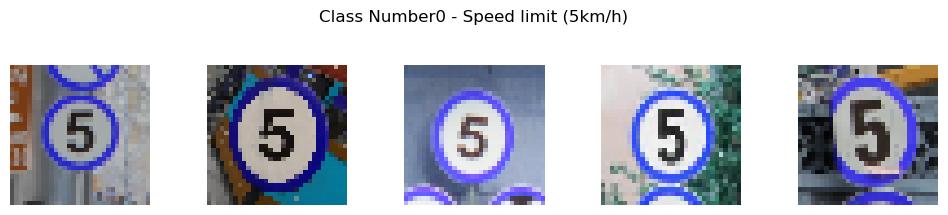

Total number for class number 1 : 23


IndexError: index 23 is out of bounds for axis 0 with size 23

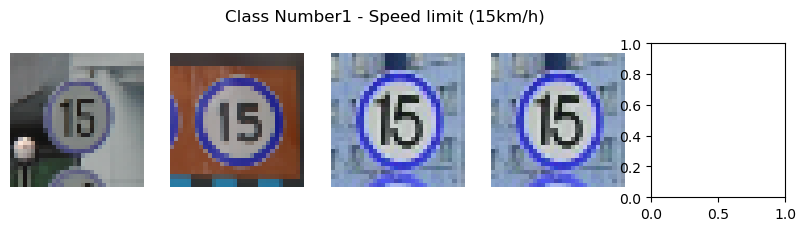

In [ ]:
columns = 5

# Loop through each class and create a new figure for each
for classNo, row in data.iterrows():
    #print(row)
    fig, axs = plt.subplots(nrows=1, ncols=columns, figsize=(10, 2)) # ouput for 1 row with 5 columns
    fig.suptitle(f"Class Number{classNo} - {row['Name']}", fontsize=12, y=1.05) # ouput the tile for the plot Class [class id] - row['Name']

    # get the pixels values of image, in this case, filter the correct image that match with classNO
    x_selected = X_train[y_train == classNo]    
    lengthOfXselect = len(x_selected)
    print(f"Total number for class number {classNo} : {lengthOfXselect}")

    for col in range(columns):
        # get random inxdex from selected images which is numpy array
        random_index = random.randint(0, lengthOfXselect - 1)
        axs[col].imshow(x_selected[random_index, :, :], cmap="gray")
        # hide the axis number to view clearly
        axs[col].axis("off")
    
    # print out the image
    plt.tight_layout() # make the layout for photo
    plt.show() # print our photo